In [3]:
class mlstat_point:
    def __init__(self, step, color):
        self.step = step
        self.color = color

def extract_mlstat(filename, temp, stage, offset):
    file = open(filename, 'r')
    lines = file.readlines()
    
    for l in lines:
        split = l.split()
        if float(split[3]) == 2:
            mlstat[temp][stage].append(mlstat_point(float(split[1])+offset, 'tab:blue'))
        if float(split[3]) == 3:
            mlstat[temp][stage].append(mlstat_point(float(split[1])+offset, 'tab:orange'))
        if float(split[3]) == 4:
            mlstat[temp][stage].append(mlstat_point(float(split[1])+offset, 'tab:red'))

In [5]:
t1s1 = []
t1s2 =[]
t2s1 = []
t1 = [t1s1, t1s2]
t2 = [t2s1]
mlstat = [t1, t2]

files = ['t1s1c1.txt', 't1s1c2.txt', 't1s1c3.txt','t1s1c4.txt', 't1s1c5.txt', 't1s2c1.txt', 't2s1c1.txt']
temps = [0, 0, 0, 0, 0, 0, 1]
stages = [0, 0, 0, 0, 0, 0, 0]
offsets = [0, 1945, 5000, 7500, 10000, 15000, 0]

for f, t, s, o in zip(files, temps, stages, offsets):
    extract_mlstat(f, t, s, o)

Text(0, 0.5, '200 K\n+0.00% vol.')

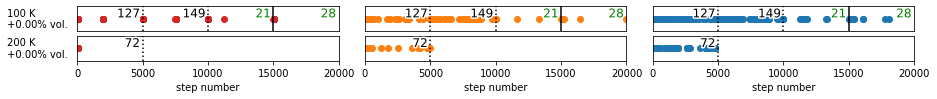

In [100]:
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects

figsize=(15, 15)

fig, ax = plt.subplots(2,3, figsize=(15, 1))
plt.subplots_adjust(wspace=0.1)
axes = [ax[0][0], ax[0][1], ax[0][2], ax[1][0], ax[1][1], ax[1][2]]

for d in mlstat[0][0]:
    if d.color == 'tab:red':
        ax[0][0].scatter(d.step, 1, color=d.color)
        
for d in mlstat[0][0]:
    if d.color == 'tab:orange':
        ax[0][1].scatter(d.step, 1, color=d.color)
        
for d in mlstat[0][0]:
    if d.color == 'tab:blue':
        ax[0][2].scatter(d.step, 1, color=d.color)
        
for d in mlstat[1][0]:
    if d.color == 'tab:red':
        ax[1][0].scatter(d.step, 1, color=d.color)
        
for d in mlstat[1][0]:
    if d.color == 'tab:orange':
        ax[1][1].scatter(d.step, 1, color=d.color)
        
for d in mlstat[1][0]:
    if d.color == 'tab:blue':
        ax[1][2].scatter(d.step, 1, color=d.color)

for x in axes[0:3]:
    x.plot([5000, 5000], [0.5, 1.5], color='black', ls=':')
    x.plot([10000, 10000], [0.5, 1.5], color='black', ls=':')
    x.plot([15000, 15000], [0.5, 1.5], color='black')
    structures_1 = x.text(4800, 1.2, '127', ha='right', va='center', size=12)
    structures_1.set_path_effects([PathEffects.withStroke(linewidth=3, foreground='white')])
    structures_2 = x.text(9800, 1.2, '149', ha='right', va='center', size=12)
    structures_2.set_path_effects([PathEffects.withStroke(linewidth=3, foreground='white')])
    structures_3 = x.text(14800, 1.2, '21', ha='right', va='center', size=12, color='green')
    structures_3.set_path_effects([PathEffects.withStroke(linewidth=3, foreground='white')])
    structures_4 = x.text(19800, 1.2, '28', ha='right', va='center', size=12, color='green')
    structures_4.set_path_effects([PathEffects.withStroke(linewidth=3, foreground='white')])
    x.set_ylim(0.5, 1.5)
    x.set_xlim(0, 20000)
    x.set_xticks([])
    x.set_yticks([])
    
for x in axes[3:]:
    x.plot([5000, 5000], [0.5, 1.5], color='black', ls=':')
    structures_1 = x.text(4800, 1.2, '72', ha='right', va='center', size=12)
    structures_1.set_path_effects([PathEffects.withStroke(linewidth=3, foreground='white')])
    x.set_ylim(0.5, 1.5)
    x.set_xlim(0, 20000)
    x.set_yticks([])
    x.set_xticks([0, 5000, 10000, 15000, 20000])
    x.set_xlabel('step number')    
    
ax[0][0].set_ylabel('100 K\n+0.00% vol.', rotation=0, labelpad=70, size=10, va='center', ha='left')
ax[1][0].set_ylabel('200 K\n+0.00% vol.', rotation=0, labelpad=70, size=10, va='center', ha='left')